# 北京联合大学招生计划可视化

## 完成读取全部页面的数据

In [3]:
import requests
import pprint
from bs4 import BeautifulSoup
import pandas as pd
count = 0
allitem = []
for page_number in range(1,275):
    url = f"http://127.0.0.1:5000/data1?page={page_number}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table')
    rows = table.find_all('tr')
    #print(rows)
    for row in rows:
        cols = row.find_all('td')
        if (len(cols) > 0):
            allitem.append([col.text for col in cols])
            count += 1
print(len(allitem))
pprint. pprint(allitem)
#print(count)
#df = pd.DataFrame(allitem)
#print(df.dtypes)
#print(df)

5472
[['1', '2023年', '安徽', '本科', '本科二批', '理工', '大数据管理与应用', '2', '四年', '4200'],
 ['2', '2023年', '安徽', '本科', '本科二批', '理工', '地理信息科学', '2', '四年', '4600'],
 ['3', '2023年', '安徽', '本科', '本科二批', '理工', '电气工程及其自动化', '2', '四年', '4600'],
 ['4',
  '2023年',
  '安徽',
  '本科',
  '本科二批',
  '理工',
  '电气工程及其自动化（中外合作办学）',
  '6',
  '四年',
  '48000'],
 ['5', '2023年', '安徽', '本科', '本科二批', '理工', '电子商务', '2', '四年', '4200'],
 ['6', '2023年', '安徽', '本科', '本科二批', '理工', '法学', '2', '四年', '4200'],
 ['7',
  '2023年',
  '安徽',
  '本科',
  '本科二批',
  '理工',
  '轨道交通信号与控制（中外合作办学）',
  '7',
  '四年',
  '36000'],
 ['8', '2023年', '安徽', '本科', '本科二批', '理工', '会计学', '5', '四年', '4200'],
 ['9', '2023年', '安徽', '本科', '本科二批', '理工', '交通工程', '2', '四年', '4600'],
 ['10', '2023年', '安徽', '本科', '本科二批', '理工', '交通工程（中外合作办学）', '6', '四年', '48000'],
 ['11', '2023年', '安徽', '本科', '本科二批', '理工', '人工智能', '2', '四年', '4600'],
 ['12', '2023年', '安徽', '本科', '本科二批', '理工', '物流工程', '2', '四年', '4600'],
 ['13', '2023年', '安徽', '本科', '本科二批', '理工', '物流工程（中外合作办学）', '5', '四年', '

## 利用pandas模块实现数据的分析处理

In [5]:
import pandas as pd
df = pd.DataFrame(allitem)
csv_file_path = 'output_1.csv'
df.to_csv(csv_file_path ,index=False,header=0)
df

,0,1,2,3,4,5,6,7,8,9
0,1,2023年,安徽,本科,本科二批,理工,大数据管理与应用,2,四年,4200
1,2,2023年,安徽,本科,本科二批,理工,地理信息科学,2,四年,4600
2,3,2023年,安徽,本科,本科二批,理工,电气工程及其自动化,2,四年,4600
3,4,2023年,安徽,本科,本科二批,理工,电气工程及其自动化（中外合作办学）,6,四年,48000
4,5,2023年,安徽,本科,本科二批,理工,电子商务,2,四年,4200
...,...,...,...,...,...,...,...,...,...,...
5467,8,2014年,浙江,本科,本科二批,文史,人文地理与城乡规划,2,四年,4600
5468,9,2014年,浙江,本科,艺术类本科提前批,艺术,表演,2,四年,10000
5469,10,2014年,重庆,本科,本科二批,理工,法学,2,四年,4200
5470,11,2014年,重庆,本科,本科二批,理工,计算机科学与技术,5,四年,4600


## 加载爬取的数据集

In [7]:
csv_file_path = 'output_1.csv'
df=pd.read_csv(csv_file_path, header=None)
#print(df)
#print(df.head)
df.columns=['序号','年份','省份','层次','录取批次','科类','专业','计划人数','学制','学费']
#print(df)
print(df.dtypes)

序号       int64
年份      object
省份      object
层次      object
录取批次    object
科类      object
专业      object
计划人数     int64
学制      object
学费      object
dtype: object


## 某专业历年的招生总数

In [9]:
#以计算机科学与技术专业为例
df['计划人数']= df['计划人数'].astype('int64')
csdf=df[(df['专业']=='计算机科学与技术')&(df['学费']!=0)]
#print(csdf)
admissiondf = csdf.groupby('年份', as_index=False)['计划人数'].sum()
#print(admissiondf)
type(admissiondf)
admissiondf

#<class 'pandas.core.frame.DataFrame'>

,年份,计划人数
0,2014年,169
1,2015年,155
2,2016年,117
3,2017年,115
4,2018年,140
5,2019年,90
6,2020年,133
7,2021年,45
8,2022年,51
9,2023年,106


## 使用plot()函数绘制专业招生折线图

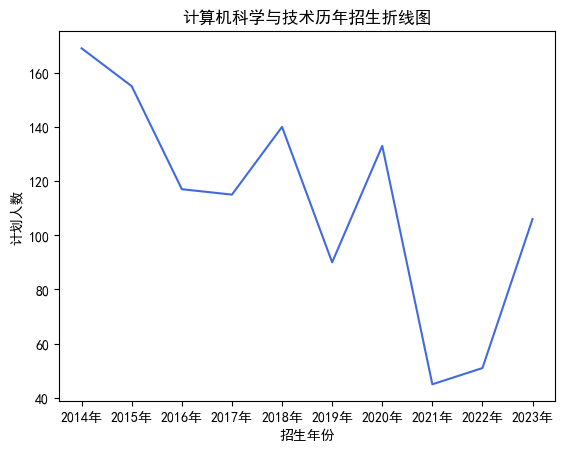

In [11]:
#initialize
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# Prepare
x = admissiondf['年份']
#print(x)
y = admissiondf['计划人数']
#print(y)

# Render
fig, ax = plt.subplots()
ax.set_title('计算机科学与技术历年招生折线图')
ax.set_xlabel('招生年份')
ax.set_ylabel('计划人数')
ax.plot(x, y,color='royalblue')
plt.savefig('计算机科学与技术历年招生折线图.png')

plt.show()

## 某专业某年各省市招生总数

In [13]:
#以计算机科学与技术专业为例
df['计划人数'] = df['计划人数'].astype('int64')
csdf=df[(df['专业']=='计算机科学与技术')&(df['学费']!=0)&(df['年份']=='2023年')]
admissiondf = csdf.groupby('省份', as_index=False)['计划人数'].sum()
admissiondf

,省份,计划人数
0,云南,2
1,北京,64
2,吉林,3
3,四川,1
4,天津,3
5,山东,6
6,山西,2
7,广西,2
8,新疆,2
9,河北,5


## 使用bar()函数绘制专业省市招生柱状图

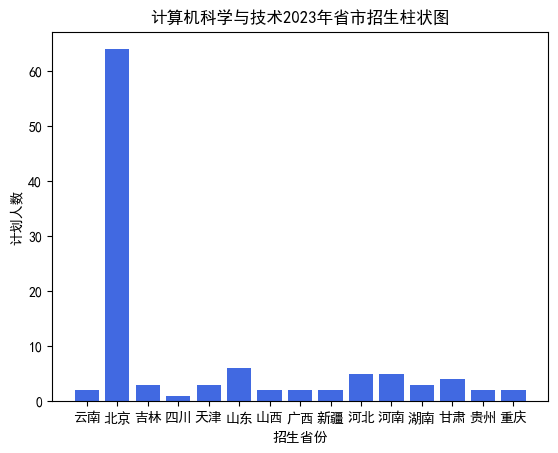

In [15]:
#initialize
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# Prepare
x = admissiondf['省份']
y = admissiondf['计划人数']

# Render
fig, ax = plt.subplots()
ax.set_title('计算机科学与技术2023年省市招生柱状图')
ax.set_xlabel('招生省份')
ax.set_ylabel('计划人数')
ax.bar(x, y,color='royalblue')
plt.savefig('计算机科学与技术2023年省市招生柱状图.png')
plt.show()

## 智慧城市学院2023年各专业招生总数

In [17]:
#计算机科学与技术、通信工程、信息安全
#物联网工程、数据科学与大数据技术
csdf=df[((df['专业']=='计算机科学与技术')|(df['专业']=='通信工程')|(df['专业']=='信息安全')|(df['专业']=='物联网工程')|(df['专业']=='数据科学与大数据技术'))&(df['学费']!=0)&(df['年份']=='2023年')]
admissiondf = csdf.groupby('专业', as_index=False)['计划人数'].sum()
admissiondf

,专业,计划人数
0,信息安全,65
1,数据科学与大数据技术,65
2,物联网工程,60
3,计算机科学与技术,106
4,通信工程,65


## 用bar()绘制学院的2023各专业招生数饼图

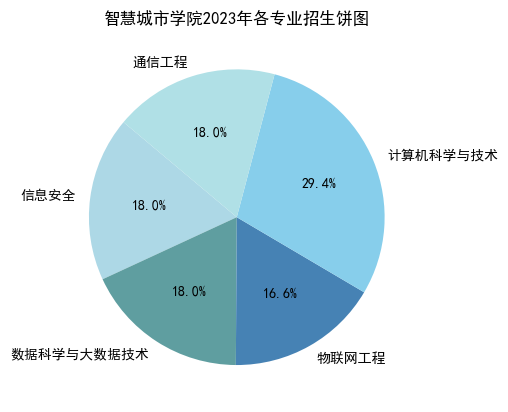

In [19]:
#initialize
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# Prepare
x=admissiondf['专业']
sum = admissiondf['计划人数'].sum()
z=[tz/sum for tz in admissiondf['计划人数'] ]
# Render
fig, ax = plt.subplots()
ax.set_title('智慧城市学院2023年各专业招生饼图')
color_set=['lightblue','cadetblue','steelblue','skyblue','powderblue']
ax.pie(z,labels=x,colors=color_set,autopct='%1.1f%%', startangle=140)
plt.savefig('智慧城市学院2023年各专业招生饼图.png')
plt.show()